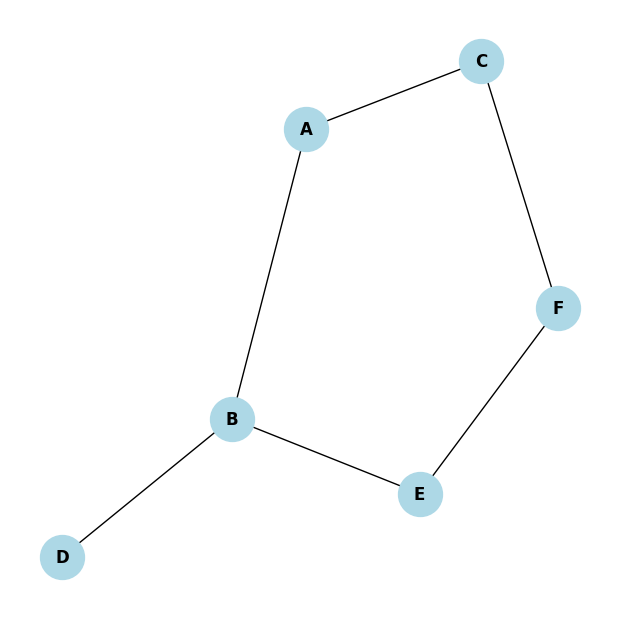

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

g = {
  'A': ['B', 'C'],
  'B': ['A', 'D', 'E'],
  'C': ['A', 'F'],
  'D': ['B'],
  'E': ['B', 'F'],
  'F': ['C', 'E']
}

for nodo, vicini in g.items():
  for vicino in vicini:
    G.add_edge(nodo, vicino)

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="lightblue", font_weight="bold", node_size=1000)
plt.show()

## Breadth-First Search (BFS)

In [2]:
def bfs(g, start, goal):
  queue = []
  visited = set()

  queue.append(start)
  visited.add(start)

  while queue:
    vertex = queue.pop(0) # coda FIFO
    if vertex==goal:
      print(f"SOLUTION: {vertex}")
      return
    print(f"Step: {vertex}")
    for n in g[vertex]:
      if n not in visited:
        visited.add(n)
        queue.append(n)
  print("No Solution Found!")

bfs(g, 'A', 'D')

Step: A
Step: B
Step: C
SOLUTION: D


## Depth-First Search (DFS)

In [3]:
def dfs(g, start, goal):
  visited = set()
  stack = []
  stack.append(start)
  visited.add(start)

  while stack:
    vertex = stack.pop() #stack LIFO
    if vertex == goal:
      print(f"SOLUTION: {vertex}")
      return
    print(f"Step: {vertex}")
    for n in g[vertex]:
      if n not in visited:
        visited.add(n)
        stack.append(n)
  print("No Solution Found!")
dfs(g, 'A', 'D')

Step: A
Step: C
Step: F
Step: E
Step: B
SOLUTION: D


## Depth-Limited Search (DLS) - Recursive & Iterative

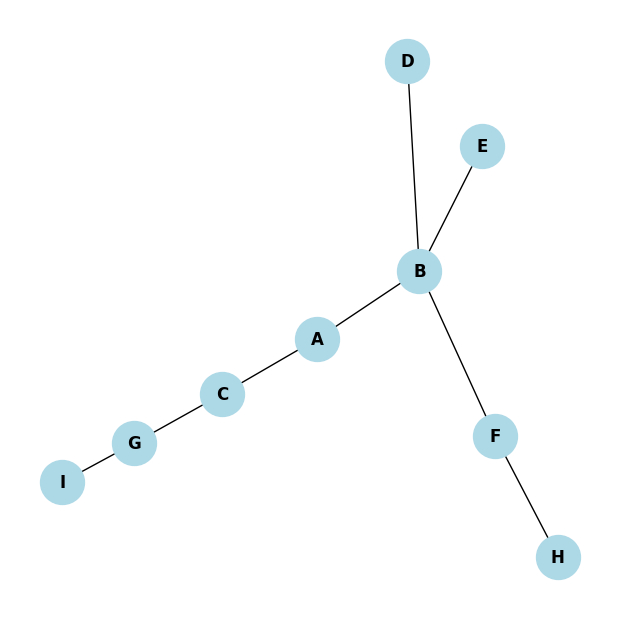

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

g1 = {
  'A' : ['B','C'],
  'B' : ['D','E','F'],
  'C' : ['G'],
  'D' : [],
  'E' : [],
  'F' : ['H'],
  'G' : ['I'],
  'H' : [],
  'I' : []
}

for nodo, vicini in g1.items():
  for vicino in vicini:
    G.add_edge(nodo, vicino)

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="lightblue", font_weight="bold", node_size=1000)
plt.show()

In [5]:
def recursive_dls(g, node, goal, limit, depth):
  cutoff_occurred = False
  print(f"Node: {node}")

  if node == goal:
    return node
  elif depth==limit:
    print("Limit reached")
    return "cutoff"
  else:
    for n in g[node]:
      result = recursive_dls(g,n,goal,limit,depth+1)
      if result == "cutoff":
        cutoff_occurred = True
      elif result != "failure":
        return result

  if cutoff_occurred:
    print(f"Cutoff occurred at node {node}")
    return "cutoff"
  else:
    print(f"Failure occured at node {node}")
    return "failure"

def depth_limited_search(g,start,goal,limit,start_depth):
  return recursive_dls(g,start,goal,limit,start_depth)

def iterative_deeping_search(graph,start,goal,limit):
  for l in range(0, limit):
    print(f"Limit: {l}")
    result = depth_limited_search(graph,start,goal,l,0)

    if result != "cutoff" and result != "failure":
      return result
    elif result=="cutoff":
      print("cutoff\n")
    else:
      print("failure\n")

print("RECURSIVE")
recursive_result = depth_limited_search(g1,'A','G',3, 0)
print("Recursive result:", recursive_result, '\n')

print("ITERATIVE")
iterative_result = iterative_deeping_search(g1,'A','G',3)
print("Iterative result:", iterative_result)

RECURSIVE
Node: A
Node: B
Node: D
Failure occured at node D
Node: E
Failure occured at node E
Node: F
Node: H
Limit reached
Cutoff occurred at node F
Cutoff occurred at node B
Node: C
Node: G
Recursive result: G 

ITERATIVE
Limit: 0
Node: A
Limit reached
cutoff

Limit: 1
Node: A
Node: B
Limit reached
Node: C
Limit reached
Cutoff occurred at node A
cutoff

Limit: 2
Node: A
Node: B
Node: D
Limit reached
Node: E
Limit reached
Node: F
Limit reached
Cutoff occurred at node B
Node: C
Node: G
Iterative result: G


##Hill Climbing

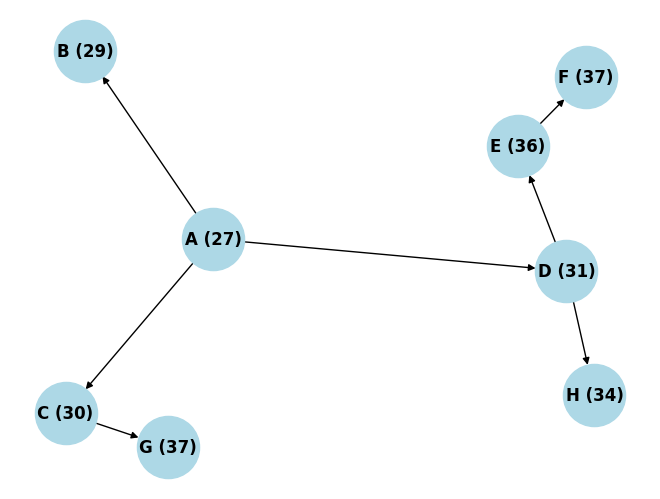

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

g2 = {
  ('A',27): [("B",29),("C",30),("D",31)],
  ('B',29): [],
  ('C',30): [('G',37)],
  ('D',31): [("H",34),("E",36)],
  ("E",36): [("F",37)],
  ("F",37):[],
  ('G',37):[],
  ("H",34):[]
}

G = nx.DiGraph()

for node, edges in g2.items():
  G.add_node(node[0], value=node[1])
  for edge in edges:
    G.add_node(edge[0], value=edge[1])
    G.add_edge(node[0], edge[0])

node_labels = {node: f"{node} ({data['value']})" for node, data in G.nodes(data=True)}
nx.draw(G, with_labels=True, labels=node_labels, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold')

plt.show()

In [7]:
def hill_climbing(g, start):
  current = start
  successor = []

  while True:
    successor.clear()
    for n in g[current]:
      successor.append(n)
    print(successor)
    if len(successor)==0:
      return current
    neighbor = max(successor, key=lambda x:x[1])
    if neighbor[1] <= current[1]:
      return current
    else:
      current=neighbor
    print(current)

risultato=hill_climbing(g2,('A',27))
print(risultato)

[('B', 29), ('C', 30), ('D', 31)]
('D', 31)
[('H', 34), ('E', 36)]
('E', 36)
[('F', 37)]
('F', 37)
[]
('F', 37)


## Simulated Annealing

In [8]:
import random
from math import exp

def schedule(t):
  return max(0.01, min(1, 1 - t * 0.001))

def simulated_annealing(graph, start):
  current = start
  for t in range(1, 10000):
    T = schedule(t)
    if T == 0:
      return current

    neighbors = graph.get(current, [])
    if not neighbors:
      return current

    next_node = random.choice(neighbors)
    delta_e = next_node[1] - current[1]

    if delta_e > 0 or exp(delta_e / T) > random.random():
      current = next_node

  return current

solution = simulated_annealing(g2, ('A', 27))
print(f"Final solution: {solution}")

Final solution: ('B', 29)


## Best first
Algoritmo di ricerca che esplora i nodi in base a una funzione di priorità (come l'euristica greedy). In questo caso usiamo la distanza aerea tra le città e Bucharest


In [29]:
g3 = {
  'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
  'Zerind': {'Arad': 75, 'Oradea': 71},
  'Oradea': {'Zerind': 71, 'Sibiu': 151},
  'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
  'Timisoara': {'Arad': 118, 'Lugoj': 111},
  'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
  'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
  'Drobeta': {'Mehadia': 75, 'Craiova': 120},
  'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
  'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
  'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
  'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
  'Bucharest': {'Fagaras': 211, 'Pitesti': 101}
}

h = {
  'Arad': 366, 'Zerind': 374, 'Oradea': 380, 'Sibiu': 253, 'Timisoara': 329,
  'Lugoj': 244, 'Mehadia': 241, 'Drobeta': 242, 'Craiova': 160,
  'Rimnicu Vilcea': 193, 'Fagaras': 176, 'Pitesti': 100, 'Bucharest': 0
} # Distanze aeree stimate a Bucharest (euristica h(n))

def best_first_search(grafo, h, start, goal):
  fringe = [(h[start], start)]
  visitati = set()
  padre = {start: None}
  costo_totale = {start: 0}

  while fringe:
    fringe.sort()
    _, corrente = fringe.pop(0)

    if corrente == goal:
      break

    visitati.add(corrente)

    for vicina, costo in grafo[corrente].items():
      if vicina not in visitati and vicina not in padre:
        padre[vicina] = corrente
        costo_totale[vicina] = costo_totale[corrente] + costo
        fringe.append((h[vicina], vicina))

  percorso = []
  nodo = goal
  while nodo:
    percorso.append(nodo)
    nodo = padre[nodo]
  percorso.reverse()

  return percorso, costo_totale[goal]


path, costo = best_first_search(g3, h, "Arad", "Bucharest")
print(path, costo)

['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450


### Euristica greedy per altri problemi (TSP completamente connesso)
L'euristica greedy è una strategia di risoluzione di un problema nella quale si sceglie sempre l'opzione migliore localmente (in questo caso la città più vicina), può essere applicata a diversi problemi.

Il Travelling Salesman Problem (TSP) completamente connesso è un problema di ottimizzazione che consiste nel trovare un percorso che colleghi tutti i nodi in un grafo per poi tornare a quello iniziale

In [11]:
g_tsp = {
  'Bucharest': {
      'Arad': 166,
      'Sibiu': 225,
      'Fagaras': 445,
      'Craiova': 410,
      'Timisoara': 530
  },
  'Arad': {
      'Bucharest': 166,
      'Sibiu': 390,
      'Fagaras': 274,
      'Craiova': 300,
      'Timisoara': 395
  },
  'Sibiu': {
      'Bucharest': 225,
      'Arad': 390,
      'Fagaras': 615,
      'Craiova': 325,
      'Timisoara': 675
  },
  'Fagaras': {
      'Bucharest': 445,
      'Arad': 274,
      'Sibiu': 615,
      'Craiova': 315,
      'Timisoara': 330
  },
  'Craiova': {
      'Bucharest': 410,
      'Arad': 300,
      'Sibiu': 325,
      'Fagaras': 315,
      'Timisoara': 600
  },
  'Timisoara': {
      'Bucharest': 530,
      'Arad': 395,
      'Sibiu': 675,
      'Fagaras': 330,
      'Craiova': 600
  }
}

def greedy_tsp(g, start):
  visitate = set([start])
  percorso = [start]
  distanza_totale = 0
  corrente = start

  while len(visitate) < len(g):
    prossimo = None
    distanza_minima = float('inf')

    prossimo, distanza_minima = min(((c, d) for c, d in g[corrente].items() if c not in visitate), key=lambda x: x[1], default=(None, float('inf'))) #distanza minima tra le città non visitate e quella corrente

    if prossimo is None:
      break

    percorso.append(prossimo)
    visitate.add(prossimo)
    distanza_totale += distanza_minima
    corrente = prossimo

  distanza_totale += g[corrente][start] # Torna alla città di partenza
  percorso.append(start)

  return percorso, distanza_totale

percorso, distanza_totale = greedy_tsp(g_tsp, 'Bucharest')
print("Percorso:", percorso)
print("Distanza totale:", distanza_totale)

Percorso: ['Bucharest', 'Arad', 'Fagaras', 'Craiova', 'Sibiu', 'Timisoara', 'Bucharest']
Distanza totale: 2285


## Algoritmo Genetico

In [12]:
import random

random.seed(5)

POPULATION_SIZE = 100
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ 1234567890'''
TARGET = "30L a tutti"
MAX_STEP = 50

class Individual(object):
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			prob = random.random()

			if prob < 0.45:
				child_chromosome.append(gp1)
			elif prob < 0.90:
				child_chromosome.append(gp2)
			else:
				child_chromosome.append(self.mutated_genes())

		return Individual(child_chromosome)

	def cal_fitness(self):
		#Fitness score - differenza con la stringa TARGET
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs == gt: fitness+= 1
		return fitness

generation = 1
found = False
population = []

for _ in range(POPULATION_SIZE):
  gnome = Individual.create_gnome()
  population.append(Individual(gnome))

while not found:

	population = sorted(population, key = lambda x:x.fitness, reverse=True)

	if population[0].fitness >= len(TARGET):
		found = True
		break
	elif generation >= MAX_STEP:
		break

	new_generation = []
  #ELITISM (il 10% migliore della popolazione viene direttamente portato nella successiva)
	e = int((10*POPULATION_SIZE)/100)
	new_generation.extend(population[:e])

	#CULLING (si elimina il 10% della popolazione con fitness minore)
	c = POPULATION_SIZE-int((10*POPULATION_SIZE)/100)
	population = population[:c]

	s = int((90*POPULATION_SIZE)/100)
	for _ in range(s):
    #parent1, parent2 = random.choices(population[:50], k=2) #SELECTION WITH TRUNCATION
		weights = [chromosome.fitness for chromosome in population]
		parent1, parent2 = random.choices(population, weights=weights, k=2) #Roulette wheel SELECTION
		child = parent1.mate(parent2) #CROSSOVER AND MUTATION
		new_generation.append(child)

	population = new_generation

	print("Generation: {}\tString: {}\tFitness: {}".format(generation,"".join(population[0].chromosome),population[0].fitness), found)

	generation += 1


print("Generation: {}\tString: {}\tFitness: {}".format(generation,
  "".join(population[0].chromosome),
  population[0].fitness), found)

Generation: 1	String: Tvetw tESul	Fitness: 2 False
Generation: 2	String: Y0twS QuNtt	Fitness: 4 False
Generation: 3	String: Y0twS QuNtt	Fitness: 4 False
Generation: 4	String: V0tSSftu8ti	Fitness: 5 False
Generation: 5	String: 90cXI tuSti	Fitness: 6 False
Generation: 6	String: 90cXI tuSti	Fitness: 6 False
Generation: 7	String: 90cXI tuSti	Fitness: 6 False
Generation: 8	String: 90cXI tuSti	Fitness: 6 False
Generation: 9	String: 90cXI tuSti	Fitness: 6 False
Generation: 10	String: 80twS tutti	Fitness: 7 False
Generation: 11	String: 80twS tutti	Fitness: 7 False
Generation: 12	String: 80twS tutti	Fitness: 7 False
Generation: 13	String: 80twS tutti	Fitness: 7 False
Generation: 14	String: 80twS tutti	Fitness: 7 False
Generation: 15	String: 80twS tutti	Fitness: 7 False
Generation: 16	String: 80twS tutti	Fitness: 7 False
Generation: 17	String: 80twS tutti	Fitness: 7 False
Generation: 18	String: 30LOi iutti	Fitness: 8 False
Generation: 19	String: 30LOi iutti	Fitness: 8 False
Generation: 20	String

## A*

In [13]:
def a_star(graph, heuristics, start, goal):
  open_set = [start] # contiene i nodi che devono ancora essere esplorati
  came_from = {} # traccia il nodo precedente per ogni nodo visitato
  g_score = {start: 0} # tiene traccia del costo più basso per arrivare a ciascun nodo partendo da start
  f_score = {start: heuristics.get(start, float('inf'))} # calcola la somma di g_score e heuristics, ed è utilizzato per determinare la priorità di esplorazione dei nodi

  while open_set:
    current = min(open_set, key=lambda x: f_score.get(x, float('inf'))) # seleziona il nodo con punteggio di f score più basso

    if current == goal: # calcolo del costo totale e del path
      path = []
      total_cost = g_score[goal]
      while current in came_from:
        path.append(current)
        current = came_from[current]
      path.append(start)
      return path[::-1], total_cost

    open_set.remove(current) # Rimozione del nodo corrente dall'insieme da esplorare

    for neighbor, cost in graph.get(current, []):
      tentative_g_score = g_score[current] + cost # per ogni nodo vicino (neighbor) al nodo corrente (current), calcoliamo il costo totale (tentative_g_score) per raggiungere il vicino passando per il nodo corrente. Questo è dato dalla somma del costo di g_score[current] e il costo per raggiungere il vicino (cost).

      if neighbor not in g_score or tentative_g_score < g_score[neighbor]: # Aggiornamento delle informazioni dei vicini
        came_from[neighbor] = current # memorizziamo il nodo da cui siamo arrivati al vicino
        g_score[neighbor] = tentative_g_score # aggiorniamo il costo per arrivare al vicino
        f_score[neighbor] = tentative_g_score + heuristics.get(neighbor, float('inf')) # ricalcoliamo il punteggio f_score del vicino come la somma del costo totale per arrivarci e l'euristica
        open_set.append(neighbor)

  return None, None

# Dati del grafo e delle euristiche
graph = {
  "Arad": [("Sibiu", 140), ("Timisoara", 118), ("Zerind", 75)],
  "Sibiu": [("Arad", 140), ("Fagaras", 99), ("Oradea", 151), ("Rimnicu Vilcea", 80)],
  "Fagaras": [("Sibiu", 253), ("Bucarest", 211)],
  "Bucarest": [("Pitesti", 101), ("Bucarest", 211)],
  "Timisoara": [("Arad", 118)],
  "Zerind": [("Oradea", 71), ("Arad", 75)],
  "Oradea": [("Zerind", 71), ("Sibiu", 151)],
  "Rimnicu Vilcea": [("Craiova", 256), ("Pitesti", 97), ("Sibiu", 80)],
  "Craiova": [("Rimnicu Vilcea", 146), ("Pitesti", 138)],
  "Pitesti": [("Bucarest", 101), ("Craiova", 138), ("Rimnicu Vilcea", 97)]
}

heuristics = {
  'Arad': 366,
  'Sibiu': 253,
  'Fagaras': 176,
  'Bucarest': 0,
  'Timisoara': 329,
  'Zerind': 374,
  'Oradea': 380,
  'Rimnicu Vilcea': 193,
  'Craiova': 160,
  'Pitesti': 100
} # distanze in linea d'aria

path, total_cost = a_star(graph, heuristics, 'Arad', 'Bucarest')
print("Percorso ottimale:", path)
print("Costo totale:", total_cost)

Percorso ottimale: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucarest']
Costo totale: 418
